In [1]:
import os
import os.path as path
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from wiggler_radiation.transmission_data import vcm_transmission
transmission_directory = os.path.join(os.getcwd(),'spectral_transmission_data')

In [2]:
qe_df = pd.read_csv(os.path.join(transmission_directory,'detector_qe.csv'), header=None, delimiter=';')
QE  = interp1d(qe_df.iloc[:,0]/1000, qe_df.iloc[:,1], kind='cubic',
               bounds_error=False,
               fill_value=(0, 0))

In [3]:
l_arr = np.linspace(0.4,0.9, 1000)

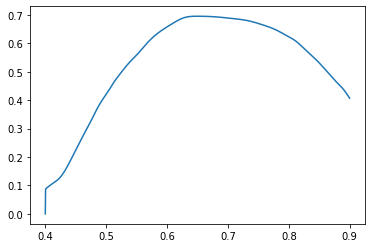

In [4]:
plt.plot(l_arr, QE(l_arr))

In [5]:
lens_df = pd.read_csv(os.path.join(transmission_directory,'AC508-180-AB_transmission.csv'), header=None, delimiter=';')
lens  = interp1d(lens_df.iloc[:,0]/1000, lens_df.iloc[:,1]/100, kind='cubic',
               bounds_error=False,
               fill_value=(0, 0))

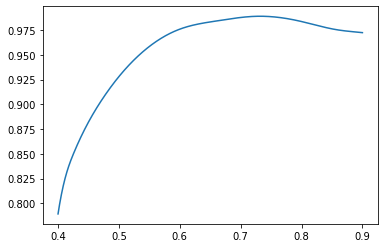

In [6]:
plt.plot(l_arr, lens(l_arr))

In [7]:
xl_file=pd.read_excel(path.join(transmission_directory,'FEL0500.xlsx'))
wavelength_data = xl_file.iloc[1:,0]/1000
transmission_data = xl_file.iloc[1:,1]/100
longpass = interp1d(wavelength_data,transmission_data,kind = 'cubic')

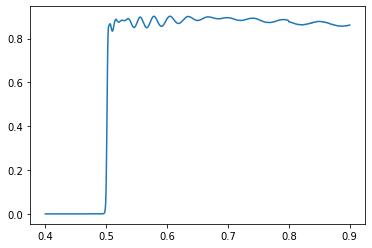

In [8]:
plt.plot(l_arr, longpass(l_arr))

In [9]:
xl_file=pd.read_excel(path.join(transmission_directory,'FES0800.xlsx'))
wavelength_data = xl_file['Wavelength (nm)']/1000
transmission_data = xl_file['% Transmission']/100
shortpass = interp1d(wavelength_data,transmission_data,kind = 'cubic')

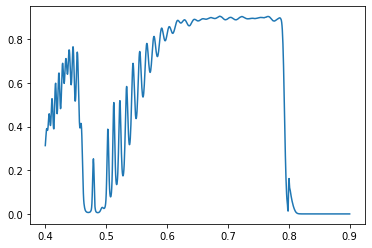

In [10]:
plt.plot(l_arr, shortpass(l_arr))

In [11]:
mirrors_file = os.path.join(transmission_directory, "mirror.csv")
mirrors_df = pd.read_csv(mirrors_file)
mirrors_df['reflectance'] = mirrors_df['reflectance_percent']*0.01
mirrors_df['wavelength_um'] = mirrors_df['wavelength_nm']*0.001
mirror = interp1d(mirrors_df['wavelength_um'],
                              mirrors_df['reflectance'],
                              bounds_error=False,
                              fill_value=(0, 0))

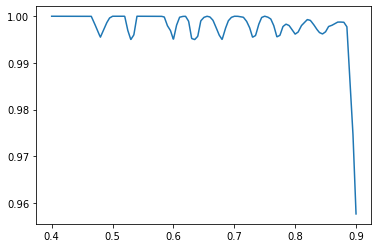

In [12]:
plt.plot(l_arr, mirror(l_arr))

In [13]:
def transmission_function(lambda_um):
    return mirror(lambda_um)**2\
           * lens(lambda_um)\
           * QE(lambda_um)\
           * vcm_transmission(lambda_um)\
           * shortpass(lambda_um)\
           * longpass(lambda_um)

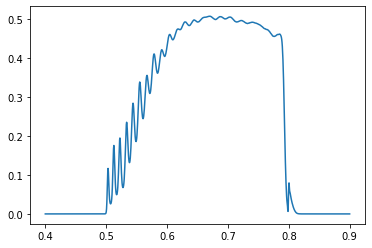

In [14]:
plt.plot(l_arr, transmission_function(l_arr))

In [15]:
from transmission_data import transmission_function

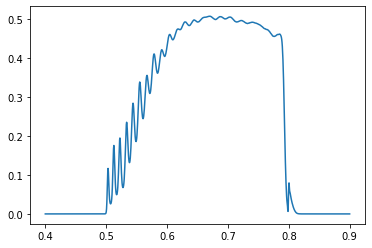

In [16]:
plt.plot(l_arr, transmission_function(l_arr))